<a href="https://colab.research.google.com/github/nullislandlife/peer_review/blob/main/NDWI_for_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***`Before starting to run the cells, copy to your google drive`***

When the below code is executed, it installs the tree package on the system. Once installed, the tree command can be used to visualize the directory structure of a folder, showing all the subfolders and files in a hierarchical manner.

In simpler terms, it's like installing a special tool that helps us see the organization of files and folders on a computer. It makes it easier to understand how files are organized and where they are located.

In [1]:
!sudo apt-get install tree

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  tree
0 upgraded, 1 newly installed, 0 to remove and 15 not upgraded.
Need to get 43.0 kB of archives.
After this operation, 115 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 tree amd64 1.8.0-1 [43.0 kB]
Fetched 43.0 kB in 0s (595 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package tree.
(Reading database ... 123069 files and directories currently installe

I uploaded Sentinel-2 imagery onto a GitHub repository.
This line of code is used to clone a GitHub repository and download its contents onto Google Colabotory.

1.   "git clone": "git" is a tool used to manage code repositories, and "clone" is a command that copies a repository.

2.   "https://github.com/RassCrom/ndwi_tutorial_rrr.git": This is the web address (URL) of the repository you want to clone. It is like the location of the repository on the internet.

So, when you run this line of code, it tells your computer (in that case Google Colab) to go to the internet and make a copy of the repository located at the given web address. The copied repository will be saved so you can access its files and folders.

In [2]:
!git clone https://github.com/RassCrom/ndwi_tutorial_rrr.git

Cloning into 'ndwi_tutorial_rrr'...
remote: Enumerating objects: 14, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 14 (delta 1), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (14/14), 27.91 MiB | 8.84 MiB/s, done.


When executed, the command will generate a hierarchical representation of the directory structure under the "/content/" directory, showing only directories and their subdirectories. It can be useful for visually understanding the organization of files and directories within a specific location.

In [3]:
!tree -d /content/

/content/
├── ndwi_tutorial_rrr
│   └── sentinel_cropped
└── sample_data

3 directories


1.   "ls": This is a command that stands for "list." It is used to list the files and folders in a directory.
2.   "ndwi_tutorial_rrr/sentinel_cropped/": This is the path to a specific folder or directory. It is like a location on your computer where files and folders are stored.

When you run this line of code in Google Colab, it tells the program to show you a list of files and folders that are inside the "sentinel_cropped" folder within the "ndwi_tutorial_rrr" directory.

For example, if you imagine your computer as a big bookshelf with different folders for storing things, this command is like asking Google Colab to open a specific folder (sentinel_cropped) on that bookshelf (ndwi_tutorial_rrr) and show you a list of what's inside.

This can be helpful for students who want to see the contents of a specific folder, such as images or data files, in order to work with them in their coding exercises or projects.

In [4]:
!ls ndwi_tutorial_rrr/sentinel_cropped/

T12SVC_20230623T175911_B02_20m.tif  T12SVC_20230623T175911_B11_20m.tif
T12SVC_20230623T175911_B03_20m.tif  T12SVC_20230623T175911_B8A_20m.tif
T12SVC_20230623T175911_B04_20m.tif




1.   "pip": Pip is a package manager for Python. It helps you install and manage external libraries or packages that provide additional functionalities to your Python programs.
2.   "install": This is a command that tells pip to install a specific package.
3.   "rasterio": Rasterio is a Python library for reading and working with geospatial raster data, such as satellite imagery or digital elevation models.

By installing rasterio, you gain the ability to read, process, and analyze raster data, which can be useful for working with maps, satellite images, or any other type of geospatial data.

For more info about rasterio library, you can check official documentation - https://rasterio.readthedocs.io/en/stable/index.html

In [5]:
!pip install rasterio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 85.6 MB/s eta 0:00:00


1.   `glob`: The glob library helps you retrieve file paths or names that match a specific pattern. It is often used for file searching or batch processing.
2.   `rasterio.plot.show`: This module within rasterio allows you to visualize raster data. It provides functions for displaying raster images or plots.
3. `numpy`: numpy is a powerful numerical computing library in Python. It provides efficient array operations and mathematical functions, which are essential for working with raster data.
4. `matplotlib.pyplot`: `matplotlib.pyplot` is a library used for creating visualizations in Python. It provides a wide range of functions for creating plots, charts, and graphs.

For more information about libraries thah have been used, read official documentation:

*   glob - https://docs.python.org/3/library/glob.html
*   rasterio.plot.show - https://rasterio.readthedocs.io/en/stable/api/rasterio.plot.html
*   numpy - https://numpy.org/doc/stable/
*   matplotlib.pyplot - https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html


In [6]:
import glob
import rasterio
from rasterio.plot import show, show_hist
import numpy as np
import matplotlib.pyplot as plt

1.   `file_path` = '/content/ndwi_tutorial_rrr/sentinel_cropped/': This line assigns the directory path where the target files are located to the variable file_path. The specified directory path is /content/ndwi_tutorial_rrr/sentinel_cropped/.
2.   `file_pattern = file_path + "*.tif"`: This line defines a file pattern by concatenating the `file_path` variable with `"*.tif"`. The * is a wildcard character that matches any combination of characters, and **.tif*  indicates that we are searching for files with the .tif extension.
3. `images = glob.glob(file_pattern)`: This line uses the glob.glob function from the glob library to search for files in the directory that match the specified file_pattern. The function returns a list of file paths that match the pattern and assigns it to the images variable.
4. `images.sort()`: This line sorts the images list in ascending order. It rearranges the file paths alphabetically, making it easier to process or analyze them in a specific order if needed.

In [7]:
file_path = '/content/ndwi_tutorial_rrr/sentinel_cropped/'
file_pattern = file_path + "*.tif"
images = glob.glob(file_pattern)
images.sort()

In the below line of code, we print out the list called `images` that includes 5 tif files that have been sorted. These are Sentinel-2A imagery with 20 m spatial resolution.
The region of the images is Theodore Roosevelt Lake near to Pheonix city.
Here we have 5 bands of Sentinel-2. Each name file includes order band.

*   B02 represents blue band;
*   B03 represents green band;
* B04 represents red band;
* B11 represents short-wave infrared (swir1) band;
* B8A represents near infrared (nir) band;

More information:
- about Sentinel-2 bands & combinations - https://gisgeography.com/sentinel-2-bands-combinations/
- Sentinel-2 mission - https://sentinels.copernicus.eu/web/sentinel/user-guides/sentinel-2-msi

In [8]:
images

['/content/ndwi_tutorial_rrr/sentinel_cropped/T12SVC_20230623T175911_B02_20m.tif',
 '/content/ndwi_tutorial_rrr/sentinel_cropped/T12SVC_20230623T175911_B03_20m.tif',
 '/content/ndwi_tutorial_rrr/sentinel_cropped/T12SVC_20230623T175911_B04_20m.tif',
 '/content/ndwi_tutorial_rrr/sentinel_cropped/T12SVC_20230623T175911_B11_20m.tif',
 '/content/ndwi_tutorial_rrr/sentinel_cropped/T12SVC_20230623T175911_B8A_20m.tif']

1. `opened_images` = []: This creates an empty list called `opened_images` to store the opened bands of the images.
2. `for image in images:`: This is a loop that iterates over each `image` in the `images` list.
3. `with rasterio.open(image) as dataset`:: This opens an image file using `rasterio` and assigns it to the variable `dataset`. The `with` statement ensures that the file is properly closed after it's used.
4. `band = dataset.read(1).astype('float32')`: This reads the first band of the image using `dataset.read(1)`. The `.astype('float32')` part converts the band data to floating-point numbers, which allows for more precise calculations.
5. `opened_images.append(normalized_band)`: This adds the opened band to the `opened_images` list.

Documentation for all methods that have been used here:
- https://rasterio.readthedocs.io/en/stable/api/rasterio.html#rasterio.open
- https://numpy.org/doc/stable/reference/generated/numpy.ndarray.astype.html
- https://docs.python.org/3/tutorial/datastructures.html#more-on-lists

In [9]:
opened_images = []
for image in images:
  with rasterio.open(image) as dataset:
    band = dataset.read(1).astype('float32')
    opened_images.append(band)

In this line of code, we create a single multi band image that include 5 bands.
1. `np.stack()` is a NumPy function that joins a sequence of arrays along a new axis.
2. `axis=0 `specifies the new axis along which the arrays will be stacked. In this case, `axis=0` means the arrays will be stacked vertically, creating a new axis representing the different bands.

Documentation:
- https://numpy.org/doc/stable/reference/generated/numpy.stack.html

In [10]:
layer_stack = np.stack(opened_images, axis=0)

In this code, `rasterio.open(images[0])` is used to open the first image in the list `images`. The `with` statement ensures that the file is properly closed after it's been used. The opened image is assigned to the variable `src`.

`src.meta` represents the metadata associated with the image. Metadata includes information about the image such as its spatial extent, coordinate reference system, data type, and more. `meta.copy()` creates a copy of the metadata so that any modifications made won't affect the original metadata.

Here, `meta.update()` is used to update the metadata dictionary with new values. In this case, we're updating two parameters:

1. `count` is being updated with `layer_stack.shape[0]`. `layer_stack.shape[0]`gives the number of bands or layers in the `layer_stack` array. By updating the `count` parameter, we're indicating the number of bands present in the image.
2. `dtype` is being updated with `'float32'`. `dtype` specifies the data type of the image. By setting it to `'float32'`, we're specifying that the image data should be stored as floating-point values.

These modifications to the metadata ensure that it accurately represents the new stacked image with the correct number of bands and data type.

This updated metadata can be used when writing the stacked image to a file or performing further operations.

Documentation:
- https://www.w3schools.com/python/ref_dictionary_update.asp

In [11]:
with rasterio.open(images[0]) as src:
  meta = src.meta.copy()
meta.update(count=layer_stack.shape[0], dtype=str(layer_stack.dtype))

In this code, `rasterio.open(file_path + "layer_stacked.tif", 'w', **meta)` is used to open a new file named "layer_stacked.tif" in write mode. The file path is constructed by concatenating the `file_path` variable (which holds the directory path) with the filename.

The `'w'` parameter indicates that the file is being opened in write mode, allowing us to write data to the file.

The `**meta` syntax is used to pass the metadata dictionary (meta) as keyword arguments to the `rasterio.open()` function. This ensures that the newly created file inherits the metadata properties specified in `meta`.

The opened file is assigned to the variable `src`.

Here, `src.write(layer_stack)` is used to write the layer_stack array to the opened file `(src)`. The `layer_stack` array contains the stacked image data with multiple bands. By calling `write()` on the opened file and passing the `layer_stack` array, we are writing the image data to the file.

This code effectively creates a new file named "layer_stacked.tif" and writes the stacked image data (`layer_stack`) to it, using the specified metadata (`meta`).

In [12]:
with rasterio.open(file_path + "layer_stacked.tif", 'w', **meta) as src:
  src.write(layer_stack)

In this part, the code opens the "layer_stacked.tif" file using `rasterio.open()` and assigns it to the variable `image_ls`. It then reads specific bands from the image file using the `read()` method, and assigns them to variables `r, g, and b`. These variables represent the individual bands of the image.

Next, `np.dstack()` is used to stack the bands together to create new combined images. The `dstack()` function stacks the bands along the third dimension, resulting in a three-dimensional array. The `rgb` variable contains the Red, Green, and Blue bands stacked together.

In the second part, `matplotlib` is used to create a figure with subplots. The `fig, axs = plt.subplots(1, 1, figsize=(9, 9)) `line creates a figure with a 1x1 grid of subplots.

Then, each subplot is configured using the `imshow()` function to display the corresponding combined image. The `set_title()` method is used to set the title of each subplot, and the `axis('off')` method is used to hide the axis labels and ticks.

Finally, `plt.tight_layout()` ensures that the subplots are properly spaced, and `plt.show()` displays the figure with the plotted images.

You can customize the titles by replacing `"Type the title"` with appropriate descriptions for each subplot.

Overall, this code displays the RGB image.

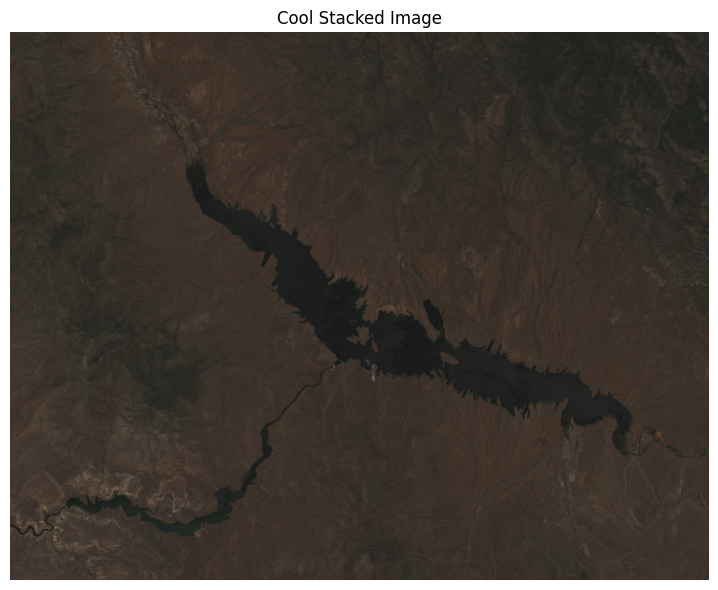

In [14]:
with rasterio.open(file_path + "layer_stacked.tif") as image_ls:
    r= image_ls.read(3)
    g = image_ls.read(2)
    b = image_ls.read(1)
    rgb = np.dstack((r, g, b))
    rgb /= rgb.max()

    fig, axs = plt.subplots(1, 1, figsize=(8, 6))
    # Second part
    # Plot RGB image
    axs.imshow(rgb)
    axs.set_title("Cool Stacked Image")
    axs.axis('off')

    plt.tight_layout()
    plt.show()

In this code snippet, the NDWI (Normalized Difference Water Index) is calculated from the bands of the "layer_stacked.tif" image file and saved as a new raster file named "layer_stacked_ndwi.tif".
1. The image file "layer_stacked.tif" is opened using `rasterio.open()`, and its metadata is copied to the `meta` variable using `meta = image_ls.meta.copy()`. This metadata contains information about the image such as its geospatial properties, coordinate reference system, and data type.
2. The metadata is updated using `meta.update(count=1, dtype='float32')`. Here, count=1 specifies that the new raster file will have only one band, and dtype='float32' sets the data type of the band to 32-bit floating point.

3. The Green and SWIR bands are read from the image using `green = image_ls.read(2)` and `swir = image_ls.read(4)` respectively. These bands will be used to calculate the NDWI.

4. The NDWI is calculated using the formula `(green - swir) / (green + swir)`. However, to handle the cases where the sum of SWIR and Red is zero (to avoid division by zero), `np.where()` function is used. If the sum is zero, `np.nan` is assigned as the value in the resulting NDWI array, otherwise, the calculation is performed.

Other useful water indices that can be used in different applications are Modernized NDWI (MNDWI), Automated Water Extraction Index (AWEI).

5. The calculated NDWI array is written to the new raster file "layer_stacked_ndwi.tif" using `rasterio.open(file_path + "layer_stacked_ndwi.tif", 'w', **meta)`. The `dst.write(ndwi, 1)` line writes the NDWI array as the first (and only) band of the new raster file.

By doing this, the code calculates the NDWI and saves it as a separate raster file for further analysis or visualization.

Refer to the following link to learn more about Sentinel-2 combinations and what they are used for: https://gisgeography.com/sentinel-2-bands-combinations/

Article about using different water indices: https://www.mdpi.com/2306-5338/10/3/70

In [15]:
with rasterio.open(file_path + "layer_stacked.tif") as image_ls:
  meta = image_ls.meta.copy()
  meta.update(count=1,dtype='float64')
  green = image_ls.read(2)
  swir = image_ls.read(4)
  ndwi = np.where((green + swir) == 0, np.nan, (green - swir) / (green + swir))
  with rasterio.open(file_path + "layer_stacked_ndwi.tif", 'w', **meta) as dst:
    dst.write(ndwi, 1)

Now, try to visualize newly created ndwi image. Use open() method in rasterio library and provide the path to the ndwi, then assign a variable with meaningful name (do not forget colon).
Next step is to visualize the index. Use show() function. Inside the parenthesis we need to provide earlier assigned variable and read its first band. Final step is to write a colour code. Usually for Easter indices, red yellow blue colours are being used.

By running this code, you will visualize the NDWI values as a color map, with each color representing a different range of values. This visualization helps in interpreting the water content in the image, where different shades of blue represent different water levels or water bodies.

Documentation:
- Choosing another color - https://matplotlib.org/stable/tutorials/colors/colormaps.html

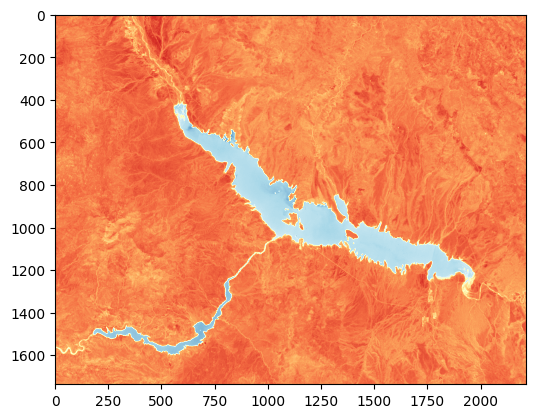

In [21]:
with rasterio.open(file_path + "layer_stacked_ndwi.tif") as bruce_ls:
  show(bruce_ls.read(1), cmap='RdYlBu')

We learnt about calculating NDWI. But now let's practice to calculate another very popular spatial index which is Normalized Difference Vegetation Index (NDVI). This index is used to assess vegetation health mainly. The formula is (NIR - Red) / (NIR + Red).

Use the code above as a reference but do not forget to change the formula and band numbers. Remember that bands are in the following order:
*   B02 represents blue band = 1;
*   B03 represents green band = 2;
* B04 represents red band = 3;
* B11 represents short-wave infrared (swir1) band = 4;
* B8A represents near infrared (nir) band = 5;

In [22]:
with rasterio.open(file_path + "layer_stacked.tif") as image_ls:
  meta = image_ls.meta.copy()
  meta.update(count=1,dtype='float64')
  red = image_ls.read(3)
  nir = image_ls.read(5)
  ndvi = np.where((green + swir) == 0, np.nan, (nir - red) / (nir + red))
  with rasterio.open(file_path + "layer_stacked_ndvi.tif", 'w', **meta) as dst:
    dst.write(ndvi, 1)

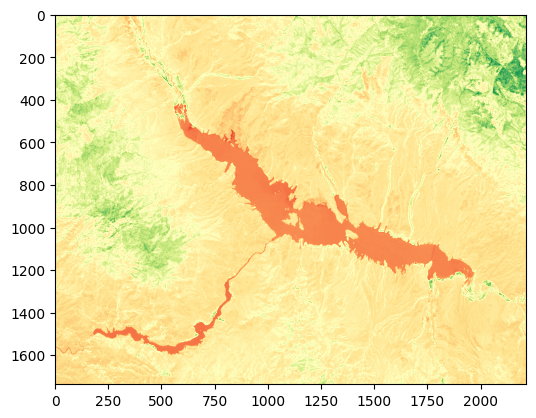

In [23]:
with rasterio.open(file_path + "layer_stacked_ndvi.tif") as brucendvi_ls:
  show(brucendvi_ls.read(1), cmap='RdYlGn')